In [1]:
from useful_scit.imps import (pd,np,xr,za,mpl,plt,sns, pjoin, os,glob,dt,
                            sys,ucp,log, splot, crt,axsplot)
import flexpart_management.modules.constants as co
ucp.set_dpi(200)

reload


In [2]:
path = '/homeappl/home/aliagadi/wrk/DONOTREMOVE/flexpart_management_data/'+\
'runs/run_2019-10-01_14-21-54_/2018-01-05/'

In [3]:
from useful_scit.imps import *
import typing
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa
import flexpart_management.modules.FLEXOUT as FO

In [28]:
fo = FO.FLEXOUT(dom='d02',folder_path=path,folder_path_out='./',run_name='name',process=False)

/homeappl/home/aliagadi/wrk/DONOTREMOVE/flexpart_management_data/runs/run_2019-10-01_14-21-54_/2018-01-05/*header_*d02*
/homeappl/home/aliagadi/wrk/DONOTREMOVE/flexpart_management_data/runs/run_2019-10-01_14-21-54_/2018-01-05/header_d02.nc


In [29]:
fo.process_log_coords()

/homeappl/home/aliagadi/wrk/DONOTREMOVE/flexpart_management_data/runs/run_2019-10-01_14-21-54_/2018-01-05/*flxout_*d02*
['/homeappl/home/aliagadi/wrk/DONOTREMOVE/flexpart_management_data/runs/run_2019-10-01_14-21-54_/2018-01-05/flxout_d02_20180105_060000.nc']


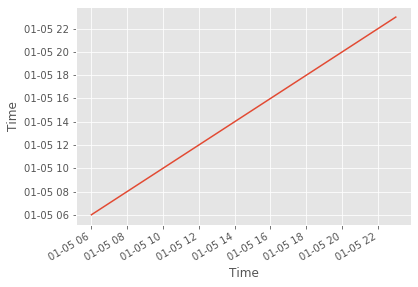

In [30]:
fo.flexout_ds[co.TIME].plot()

/homeappl/home/aliagadi/appl_taito/miniconda3/envs/b36backup/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


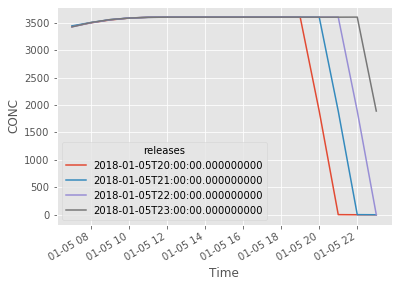

In [31]:
fo.flexout_ds[{co.RL:slice(-4,None)}
             ].squeeze().sum([co.BT,co.SN,co.WE])[co.CONC].plot(hue=co.RL)

In [32]:
log.ger.setLevel(log.log.DEBUG)
lp_ds = fo.get_log_polar_coords(release=fo.flexout_ds[co.RL][-3].values,
                               coords_to_keep=[co.BT,co.SN,co.WE,'Time_h'],
                               keep_list = [co.RL,'Time_h',co.ZT])

2019-10-02 12:25:08,332 useful_scit  DEBUG    completemt coords: ['ageclass']
2019-10-02 12:25:08,343 useful_scit  DEBUG    <xarray.Dataset>
Dimensions:     (Time_h: 18, bottom_top: 60, south_north: 450, west_east: 459)
Coordinates:
    releases    datetime64[ns] 2018-01-05T21:00:00
    ZBOT        (bottom_top) float64 0.0 500.0 1e+03 ... 2.9e+04 2.95e+04
    VOL         (south_north, west_east, bottom_top) float64 3.329e+08 ... 4.165e+10
  * Time_h      (Time_h) float64 -17.0 -16.0 -15.0 -14.0 ... -3.0 -2.0 -1.0 0.0
    ZTOP        (bottom_top) float32 500.0 1000.0 1500.0 ... 29500.0 30000.0
    XLAT        (south_north, west_east) float32 -18.632805 ... -13.911606
    ZMID        (bottom_top) float64 250.0 750.0 ... 2.925e+04 2.975e+04
    LAT         (south_north) float32 -18.632809 -18.622421 ... -13.911606
    XLONG       (south_north, west_east) float32 -70.6463 ... -65.62784
    ALT         (south_north, west_east, bottom_top) float64 250.0 ... 2.99e+04
    LON         (west_eas

In [54]:
_lp=lp_ds.squeeze()[co.CONC]
_lp = _lp.where(_lp<1e10,0)

In [48]:
_lp1=_lp.sum([co.ZTOP])

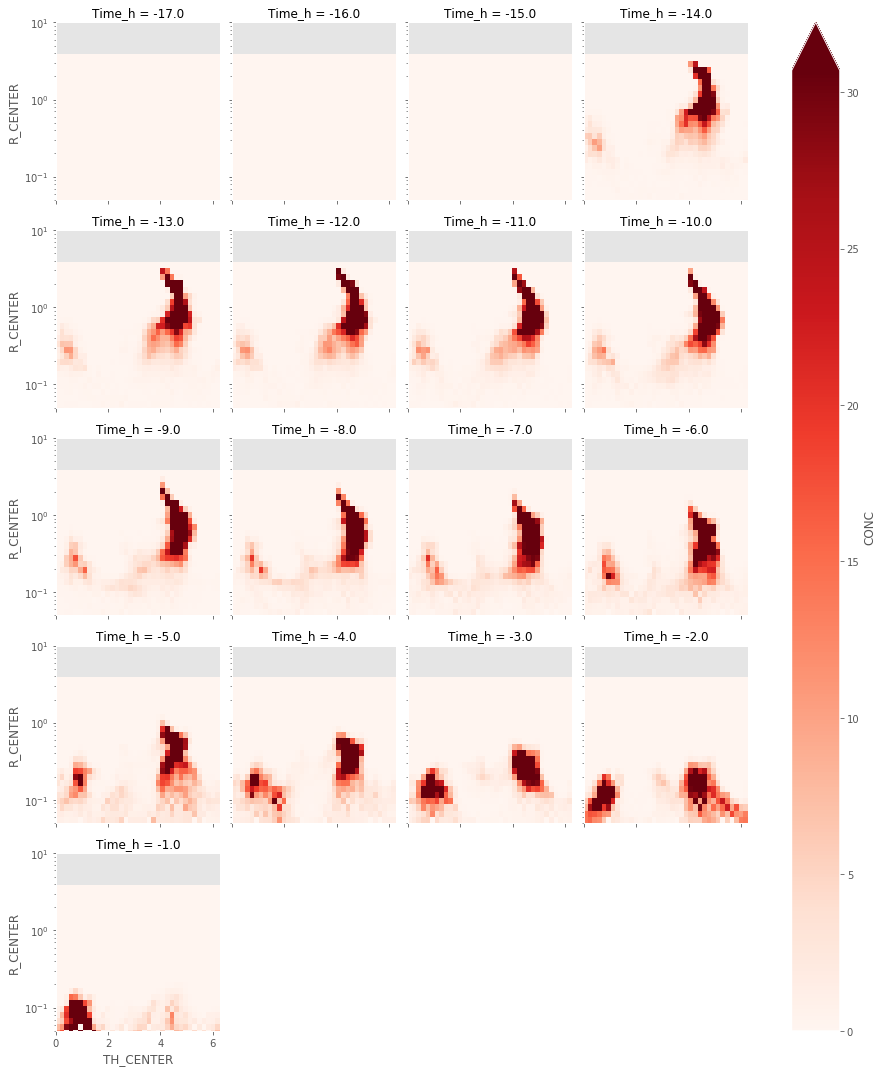

In [53]:
_lp1.loc[{'Time_h':slice(None,-1)}].plot(yscale='log',ylim=(.05,10),col='Time_h',robust=True,col_wrap=4,
                                       cmap=plt.get_cmap('Reds'))

In [56]:
_lp.sum([co.TH_CENTER,co.R_CENTER])

<xarray.DataArray 'CONC' (R_CENTER: 33, TH_CENTER: 36, Time_h: 18, ZTOP: 60)>
array([[[[0., ..., 0.],
         ...,
         [0., ..., 0.]],

        ...,

        [[0., ..., 0.],
         ...,
         [0., ..., 0.]]],


       ...,


       [[[0., ..., 0.],
         ...,
         [0., ..., 0.]],

        ...,

        [[0., ..., 0.],
         ...,
         [0., ..., 0.]]]])
Coordinates:
  * R_CENTER   (R_CENTER) float64 0.006474 0.00775 0.01592 ... 2.46 2.945 3.525
  * TH_CENTER  (TH_CENTER) float64 0.08727 0.2618 0.4363 ... 5.847 6.021 6.196
    releases   datetime64[ns] 2018-01-05T21:00:00
  * Time_h     (Time_h) float64 -17.0 -16.0 -15.0 -14.0 ... -3.0 -2.0 -1.0 0.0
  * ZTOP       (ZTOP) float64 500.0 1e+03 1.5e+03 ... 2.9e+04 2.95e+04 3e+04
    LAT        (R_CENTER, TH_CENTER) float64 -16.34 -16.34 ... -12.95 -12.84
    LON        (R_CENTER, TH_CENTER) float64 -68.12 -68.13 ... -64.73 -64.62
    LAT_00     (R_CENTER, TH_CENTER) float64 -16.34 -16.34 ... -13.32 -13.18
    LON_00  